In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### Simulating signal

#### Model: 

$y(k)=\sum_{r}A_r\sin\left(2\pi f\left[t_0+\dfrac{k}{F}-\dfrac{r}{f_m}\right]\right)\cdot e^{-\beta(L)\left(t_0 + \frac{k}{F}-\frac{r}{f_m}\right)}\cdot u\left(t_0+\dfrac{k}{F}-\dfrac{r}{f_m}\right)$

In [12]:
df=pd.read_csv("data/L030_TI_High_VEL020_fs1000.csv")
t = df['t [s]'].to_numpy()
N=len(t)
fs=1e3
r=0.46

In [19]:
r

77

0.011483040627120876


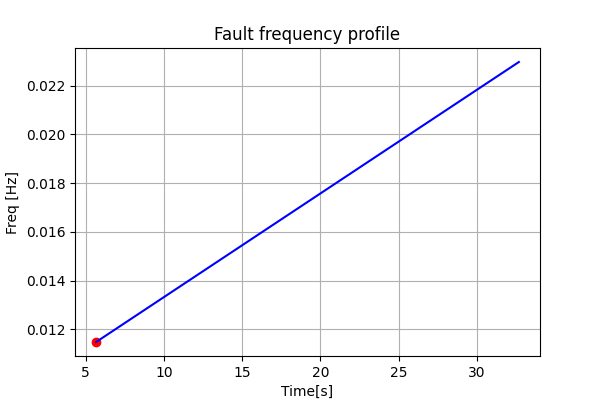

In [16]:
Ar= 1   #Amplitude
f = 55    #Resonant Frequency in Hz
b=50      #Exponential decay factor

n=np.arange(N)

#fr_var=curve_rayleigh(t)
v_var=1e3*np.linspace(20,40,N) # km/h
#v_var=20e3*np.ones((N,))

fr_var=v_var/(3600*2*np.pi*r)
print(np.min(fr_var))

f_fail=fr_var.copy()
ω_fail=2*np.pi*f_fail
θr_fail=np.cumsum(ω_fail)/fs

t_indexes=[]
t_impact=[]
N_of_impacts=np.int32(np.floor(np.max(θr_fail)/(2*np.pi)))+1
for i in range(N_of_impacts):
    t_index=np.argmin(np.abs(θr_fail-i*2*np.pi))
    t_indexes.append(t_index)
    t_impact.append(t[t_index])
    #print(i,t_index,t[t_index])

impacts=(np.array(t_indexes),np.array(t_impact))

plt.close('all')
%matplotlib widget
plt.figure(figsize=(6,4)) ### change tuple for better visualization or change inline for qt in %matplotlib inline 
plt.plot(t,f_fail,color='blue')
plt.title('Fault frequency profile')
plt.xlabel('Time[s]')
plt.ylabel('Freq [Hz]')
plt.grid()
plt.scatter(impacts[1],f_fail[impacts[0]],color='red',marker='o')
plt.show()

In [14]:
#def conditional_exp(time_diff, b):
#    return np.where(time_diff > 0, np.exp(-b * time_diff), 0)

def conditional_exp(t, b):
    result = np.zeros_like(t, dtype=float)
    positive_indices = t > 0
    result[positive_indices] = np.exp(-b * t[positive_indices])
    return result

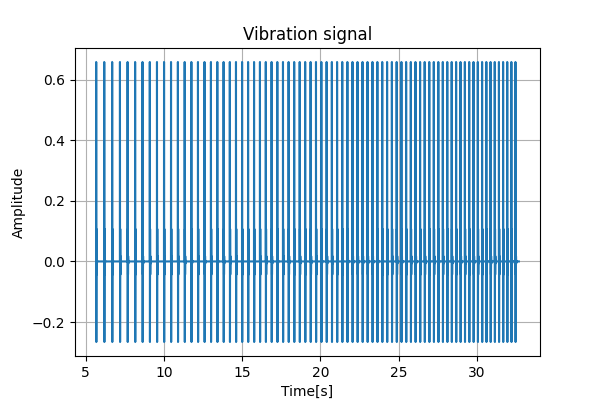

In [ ]:
Sx_var=np.zeros((N,))

for t_i in range(len(t_impact)):
    time_diff=t[0]+n/fs-t_impact[t_i]
    #Sx_var+=Ar*np.sin(2*np.pi*f*(t[0]+n/fs-t_impact[r]))*np.exp(-b*(t[0]+n/fs-t_impact[r]))*np.heaviside(t[0]+n/fs-t_impact[r], 1)
    Sx_var+=Ar*np.sin(2*np.pi*f*(time_diff))*conditional_exp(time_diff, b)*np.heaviside(time_diff, 1)


plt.close('all')
%matplotlib widget
plt.figure(figsize=(6,4))
plt.plot(t,Sx_var)
plt.grid(True)
plt.title('Vibration signal')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.show()